In [1]:
import sympy as sym
sym.init_printing()

from sympy import I, Matrix, symbols


In [142]:
A,B,C,D,F,G =sym.symbols('A B C D F G')
a_in,a_out,b_in,b_out=sym.symbols('a_in a_out b_in b_out')

Sb12,Sa12=sym.symbols('S_b_1_2 S_a_1_2')
Sb13,Sa13=sym.symbols('S_b_1_3 S_a_1_3')
w, wcm,wco=sym.symbols('omega omega_c_mu omega_c_o',Real=True) 
gammi,gammc,gamoi,gamoc=sym.symbols('gamma_mu_i gamma_mu_c gamma_o_i gamma_o_c',positive = True, Real=True)


In [3]:

in_mat=Matrix([[A,-C],[G,-D]])
out_mat=Matrix([[-B,C],[-G,F]])

In [4]:
in_mat, out_mat

⎛⎡A  -C⎤  ⎡-B  C⎤⎞
⎜⎢     ⎥, ⎢     ⎥⎟
⎝⎣G  -D⎦  ⎣-G  F⎦⎠

In [5]:
out_mat.inv()*in_mat

⎡   A⋅F          C⋅G         C⋅D          C⋅F    ⎤
⎢────────── - ──────────  ────────── - ──────────⎥
⎢-B⋅F + C⋅G   -B⋅F + C⋅G  -B⋅F + C⋅G   -B⋅F + C⋅G⎥
⎢                                                ⎥
⎢   A⋅G          B⋅G         B⋅D          C⋅G    ⎥
⎢────────── - ──────────  ────────── - ──────────⎥
⎣-B⋅F + C⋅G   -B⋅F + C⋅G  -B⋅F + C⋅G   -B⋅F + C⋅G⎦

In [144]:
A_eq=(I*(wcm+Sb12-w)+(gammi-gammc)/2)
B_eq=(I*(wcm+Sb12-w)+(gammi+gammc)/2)
C_eq=-I*Sa12*sym.sqrt(gammc/gamoc)
D_eq=(I*(wco+Sa13-w)+(gamoi-gamoc)/2)
F_eq=(I*(wco+Sa13-w)+(gamoi+gamoc)/2)
G_eq=-I*Sb13*sym.sqrt(gamoc/gammc)


In [145]:
sym.simplify((out_mat.inv()*in_mat).subs({A:A_eq,B:B_eq,C:C_eq,D:D_eq,F:F_eq,G:G_eq}))*Matrix([[b_in],[a_in]])

⎡                                                      _______   _______      
⎢                                     4⋅ⅈ⋅Sₐ ₁ ₂⋅aᵢₙ⋅╲╱ γ_μ_c ⋅╲╱ γ_o_c       
⎢- ───────────────────────────────────────────────────────────────────────────
⎢  4⋅Sₐ ₁ ₂⋅S_b_1_3 + (γ_μ_c + γₘᵤ ᵢ + 2⋅ⅈ⋅(S_b_1_2 - ω + ω_c_μ))⋅(γ_o_c + γₒ 
⎢                                                                             
⎢                                                      _______   _______      
⎢                                    4⋅ⅈ⋅S_b_1_3⋅bᵢₙ⋅╲╱ γ_μ_c ⋅╲╱ γ_o_c       
⎢- ───────────────────────────────────────────────────────────────────────────
⎣  4⋅Sₐ ₁ ₂⋅S_b_1_3 + (γ_μ_c + γₘᵤ ᵢ + 2⋅ⅈ⋅(S_b_1_2 - ω + ω_c_μ))⋅(γ_o_c + γₒ 

                                                                              
                                bᵢₙ⋅(4⋅Sₐ ₁ ₂⋅S_b_1_3 + (-γ_μ_c + γₘᵤ ᵢ + 2⋅ⅈ⋅
───────────────────────────── - ──────────────────────────────────────────────
ᵢ + 2⋅ⅈ⋅(Sₐ ₁ ₃ - ω + ω_c_o))       4⋅Sₐ ₁ ₂⋅S_b_1_

In [8]:
delo,delm, muo, mum, chi, xi, Del,a,b,c=sym.symbols('delta_o delta_mu mu_o mu_mu chi xi Delta a b c', real=True) 
sigo, sigm= sym.symbols('sigma_o sigma_mu', real=True, positive=True)


In [9]:
delosq_eq=2*sigo**2*(chi**2-1/(2*sigm**2)*delm**2)
delm_eq=delo-xi+muo-mum

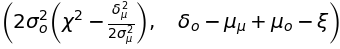

In [10]:
delosq_eq, delm_eq

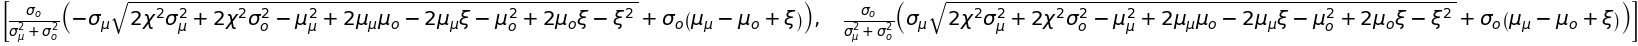

In [11]:
delo1=sym.solve(sym.simplify(delosq_eq.subs({delm:delm_eq})-delo**2),delo)
delo1

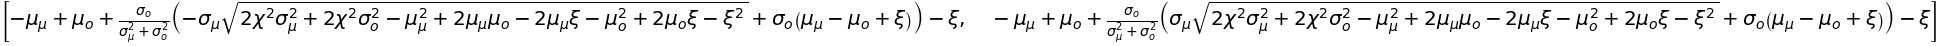

In [12]:
delm1=[(delm_eq.subs({delo:delo1[0]})),(delm_eq.subs({delo:delo1[1]}))]
delm1

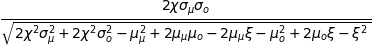

In [13]:
sym.simplify(sym.simplify(sym.simplify(sym.diff(delo1[0],chi))*sym.simplify(sym.diff(delm1[0],xi)))-sym.simplify(sym.simplify(sym.diff(delo1[0],xi))*sym.simplify(sym.diff(delm1[0],chi))))

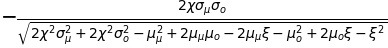

In [14]:
sym.simplify(sym.simplify(sym.simplify(sym.diff(delo1[1],chi))*sym.simplify(sym.diff(delm1[1],xi)))-sym.simplify(sym.simplify(sym.diff(delo1[1],xi))*sym.simplify(sym.diff(delm1[1],chi))))

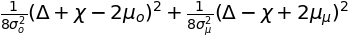

In [54]:
Del_eq=delo-delm
chi_eq=delo+delm
delo_eq=(chi+Del)/(2)
delm_eq=(chi-Del)/(2)
sym.simplify(arg1_eq.subs({delo:delo_eq,delm:delm_eq}))

In [ ]:
a,b,f = sym.symbols('a b f', real=True, positive=True)
chi, Del, g, c =sym.symbols('chi Delta g c', real=True)

In [55]:
sym.expand((f*Del-g)**2+(a*chi+b*Del-c)**2)

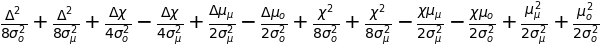

In [56]:
sym.expand(arg1_eq.subs({delo:delo_eq, delm:delm_eq}))


In [57]:

solve_eqs1=[b**2+f**2,2*a*b,-2*b*c-2*f*g,a**2, -2*a*c]
solve_eqs2=[(1/sigo**2+1/sigm**2)/8, (1/sigo**2-1/sigm**2)/4, (mum/sigm**2-muo/sigo**2)/2, (1/sigo**2+1/sigm**2)/8, (-mum/sigm**2-muo/sigo**2)/2]
solve_eq_tot=[a_i - b_i for a_i, b_i in zip(solve_eqs1,solve_eqs2)]
solve_ans=sym.solve(solve_eq_tot,[a,b,c,f,g])


In [ ]:
a_sol=sym.solve(sym.Eq(a**2,(1/sigo**2+1/sigm**2)/8), a)
solve_eqs1=[a**2, 2*a*b, -2*a*c,b**2+f**2, -2*b*c-2*f*g]#,c**2+g**2]
solve_eqs2=[(1/sigo**2+1/sigm**2)/8,(1/sigo**2-1/sigm**2)/4, (mum/sigm**2-muo/sigo**2)/2, (1/sigo**2+1/sigm**2)/8, (-mum/sigm**2-muo/sigo**2)/2]#, (mum/sigm**2+muo/sigo**2)/2]
solve_eq_tot=[a_i - b_i for a_i, b_i in zip(solve_eqs1,solve_eqs2)]
solve_ans=sym.solve(solve_eq_tot,[a,b,c,f,g])


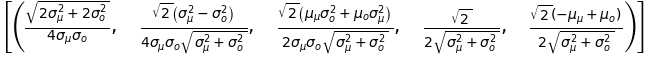

In [58]:
solve_ans

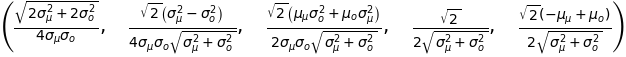

In [59]:
[a_sol,b_sol,c_sol,f_sol,g_sol]=solve_ans[0]
a_sol,b_sol,c_sol,f_sol,g_sol

In [62]:
sym.simplify((f_sol*Del-g_sol)**2+(a_sol*chi+b_sol*Del-c_sol)**2-arg1_eq.subs({delo:delo_eq, delm:delm_eq}))

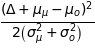

In [67]:
sym.simplify((f_sol*Del-g_sol)**2)

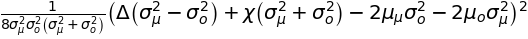

In [69]:
sym.simplify((a_sol*chi+b_sol*Del-c_sol)**2)

In [103]:
mu_Del_eq=muo-mum
sig_Del_sq=sigm**2+sigo**2

mu_chi_eq=1/(sigm**2+sigo**2)*(sigo**2*(Del+2*mum)-sigm**2*(Del-2*muo))
sig_chi_sq=4*sigm**2*sigo**2/(sigm**2+sigo**2)

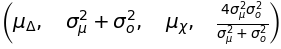

In [104]:
mu_Del,sig_del_sq,mu_chi,sig_chi_sq

In [105]:
sym.simplify((Del-mu_Del_eq)**2/(2*sig_Del_sq)+(chi-mu_chi_eq)**2/(2*sig_chi_sq)-arg1_eq.subs({delo:delo_eq, delm:delm_eq}))

In [87]:
muD=sym.symbols('mu_Delta', real=True)
sigD=sym.symbols('sigma_Delta', real=True, positive=True)
A,B,C,D,E=sym.symbols('A B C D E', real=False)


In [88]:
test_int=sym.integrate(sym.exp(-(Del-muD)**2/(2*sigD**2))*(A*Del**2+B*Del+C)/(D*Del**2+E),Del)

KeyboardInterrupt: 

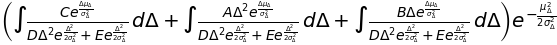

In [78]:
test_int

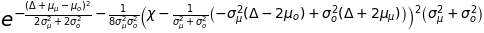

In [82]:
sym.exp(-(chi-mu_chi)**2/(2*sig_chi_sq)-(Del-mu_Del)**2/(2*sig_Del_sq))

In [94]:
sig_chi, sig_Del=sym.symbols('sigma_chi sigma_Delta', positive=True)
mu_chi, mu_Del=sym.symbols('mu_chi mu_Delta', real=True)
expfun1=1/(2*sym.pi)*1/(sig_chi*sig_Del)*sym.exp(-(Del-mu_Del)**2/(2*sig_Del**2))*sym.exp(-(chi-mu_chi)**2/(2*sig_chi**2))
expfun2=1/(2*sym.pi)*1/(sigo*sigm)*sym.exp(-(delo-sigo)**2/(2*sigo**2))*sym.exp(-(delm-sigm)**2/(2*sigm**2))

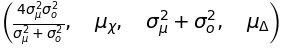

In [95]:
sig_chi_sq, mu_chi, sig_Del_sq, mu_Del

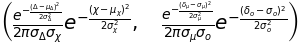

In [92]:

expfun1, expfun2

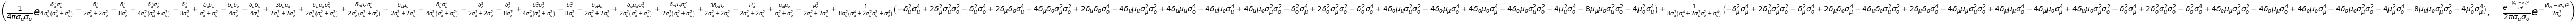

In [108]:
Del_eq=delo-delm
chi_eq=delm+delo
sym.simplify(sym.expand(expfun1.subs({sig_Del:sym.sqrt(sig_Del_sq),sig_chi:sym.sqrt(sig_chi_sq),mu_Del:mu_Del_eq,mu_chi:mu_chi_eq}).subs({chi:chi_eq,Del:Del_eq}))), expfun2
#expfun3_lam=sym.lambdify((delo,delm,sigo,sigm,muo,mum),expfun3)

In [110]:
sym.sqrt(sig_Del_sq)*sym.sqrt(sig_chi_sq)

In [129]:

test1=sym.simplify(((chi-mu_chi)**2/(2*sig_chi**2)+(Del-mu_Del)**2/(2*sig_Del**2)).subs({sig_Del:sym.sqrt(sig_Del_sq),sig_chi:sym.sqrt(sig_chi_sq),mu_Del:mu_Del_eq,mu_chi:mu_chi_eq}).subs({chi:chi_eq,Del:Del_eq}))


In [130]:
test2=(delo-muo)**2/(2*sigo**2)+(delm-mum)**2/(2*sigm**2)

In [131]:
sym.simplify(test1-test2)

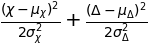

In [133]:
((chi-mu_chi)**2/(2*sig_chi**2)+(Del-mu_Del)**2/(2*sig_Del**2))

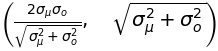

In [146]:
sym.sqrt(sig_chi_sq), sym.sqrt(sig_Del_sq)

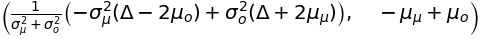

In [147]:
mu_chi_eq, mu_Del_eq